![Banner](https://raw.githubusercontent.com/quantamu/qtamu-ibm-fliq-challenge/refs/heads/main/images/banner.png)




# Grand Unified Theory (GUT) Baryogenesis Simulation using Qiskit

This notebook simulates the early-universe phenomenon of **GUT baryogenesis**, using quantum circuits designed with **Qiskit** and executed on **IBM Quantum Computers**.

Baryogenesis refers to the process that generated a matter-antimatter asymmetry in the universe. According to the Sakharov conditions, for baryogenesis to occur, the following criteria must be met:

1. **Baryon number violation**
2. **C-symmetry and CP-symmetry violation**
3. **Departure from thermal equilibrium**

Our goal is to emulate these dynamics using a quantum circuit model, representing transitions from a symmetric vacuum state to one with a net baryon number. This simulation mimics effective interactions predicted by **GUTs**, such as those based on the SU(5) or SO(10) gauge group.

We will:

- Construct an initial quantum vacuum state.
- Introduce CP-violating interactions.
- Observe baryon number violation via asymmetric output statistics.

Let’s begin by importing the necessary quantum modules.


## Quantum Modules and Tools

We begin by importing the necessary modules for simulation.

- `QuantumCircuit`, `Aer`, and `execute` from Qiskit to construct and simulate quantum circuits.
- `matplotlib` for visualizing results.
- `numpy` for numerical operations.


In [20]:
# Updated imports for the current Qiskit version
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi

# For animation of results later
from IPython.display import clear_output
import time

print("Quantum GUT Baryogenesis Simulation Environment Ready")

Quantum GUT Baryogenesis Simulation Environment Ready


### Now, let's define our qubit representation for the particles involved in GUT Baryogenesis:

Initial state created with X boson only


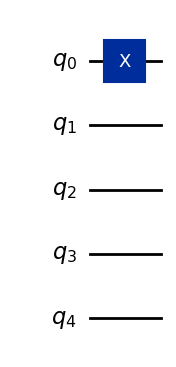

In [2]:
# Define the qubit representation
# We'll use 5 qubits: one for X boson, one for quark, one for antiquark, one for lepton, one for antilepton
# |0⟩ = no particle, |1⟩ = particle present

def create_initial_state(x_boson=1, quark=0, lepton=0, antiquark=0, antilepton=0):
    """
    Create the initial state with specified particle configuration.
    By default, we start with only X bosons present.
    """
    # Create a 5-qubit system
    # Qubit 0: X boson
    # Qubit 1: quark (0=none, 1=present)
    # Qubit 2: antiquark (0=none, 1=present)
    # Qubit 3: lepton (0=none, 1=present)
    # Qubit 4: antilepton (0=none, 1=present)
    
    qc = QuantumCircuit(5)
    
    # Set X boson
    if x_boson:
        qc.x(0)
    
    # Set quark or antiquark
    if quark:
        qc.x(1)
    if antiquark:
        qc.x(2)
        
    # Set lepton or antilepton
    if lepton:
        qc.x(3)
    if antilepton:
        qc.x(4)
        
    return qc

# Let's test our function by creating a state with only X bosons
initial_state = create_initial_state(x_boson=1)
print("Initial state created with X boson only")
initial_state.draw('mpl')

### Now, let's implement the X boson decay process with CP violation:

X boson decay circuit with CP violation (epsilon=0.1) created


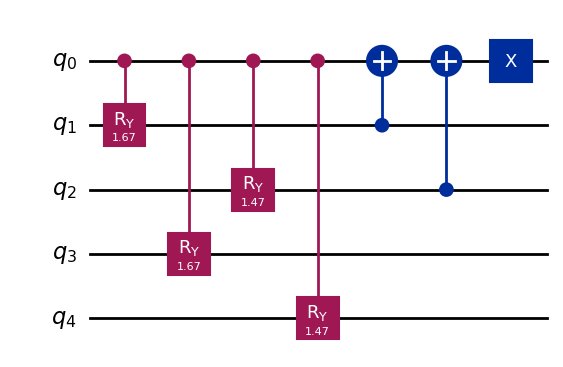

In [3]:
def create_gut_decay_circuit(epsilon=0.1):
    """
    Create a circuit that models X boson decay with CP violation.
    
    Parameters:
    -----------
    epsilon : float
        The CP violation parameter (0 <= epsilon <= 1)
    
    Returns:
    --------
    qc : QuantumCircuit
        The circuit that implements the decay
    """
    # Calculate probabilities based on CP violation
    # X → q + l with probability (1+epsilon)/2
    # X → q̄ + l̄ with probability (1-epsilon)/2
    
    p_ql = (1 + epsilon)/2
    p_qlbar = (1 - epsilon)/2
    
    # Convert probabilities to rotation angles
    theta_ql = 2 * np.arcsin(np.sqrt(p_ql))
    theta_qlbar = 2 * np.arcsin(np.sqrt(p_qlbar))
    
    # Create the circuit
    qc = QuantumCircuit(5)
    
    # X decays to q+l
    # First, we create a controlled rotation based on X boson presence
    qc.cry(theta_ql, 0, 1)  # If X boson present, create quark with probability p_ql
    qc.cry(theta_ql, 0, 3)  # If X boson present, create lepton with probability p_ql
    
    # X decays to q̄+l̄
    qc.cry(theta_qlbar, 0, 2)  # If X boson present, create antiquark with probability p_qlbar
    qc.cry(theta_qlbar, 0, 4)  # If X boson present, create antilepton with probability p_qlbar
    
    # X boson is annihilated after decay
    # We need to make this conditional on either decay happening
    # This is a bit simplified but demonstrates the concept
    qc.cx(1, 0)  # If quark is created, X is annihilated
    qc.cx(2, 0)  # If antiquark is created, X is annihilated
    qc.x(0)      # Flip the X boson qubit (now X=0 means it has decayed)
    
    return qc

# Create the decay circuit
decay_circuit = create_gut_decay_circuit(epsilon=0.1)
print("X boson decay circuit with CP violation (epsilon=0.1) created")
decay_circuit.draw('mpl')

### Let's create a function to run the simulation and measure results:

Simulation complete!
Circuit with measurements:


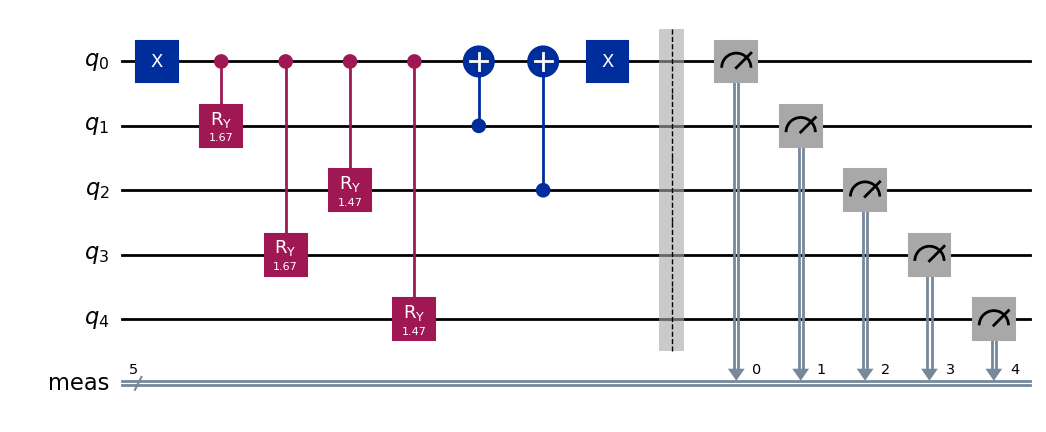

In [4]:
def run_gut_simulation(epsilon=0.1, num_shots=1000):
    """
    Run the GUT baryogenesis simulation and return results.
    
    Parameters:
    -----------
    epsilon : float
        The CP violation parameter
    num_shots : int
        Number of circuit executions
    
    Returns:
    --------
    counts : dict
        Result counts from the simulation
    """
    # Create the initial state
    qc = create_initial_state(x_boson=1)
    
    # Add the decay circuit
    decay_circuit = create_gut_decay_circuit(epsilon)
    qc = qc.compose(decay_circuit)
    
    # Measure all qubits
    qc.measure_all()
    
    # Run the simulation with updated approach
    simulator = AerSimulator()
    transpiled_qc = transpile(qc, simulator)
    job = simulator.run(transpiled_qc, shots=num_shots)
    result = job.result()
    counts = result.get_counts()
    
    return counts, qc

# Run the simulation
counts, full_circuit = run_gut_simulation(epsilon=0.1, num_shots=1000)
print("Simulation complete!")
print("Circuit with measurements:")
full_circuit.draw('mpl')

### Now, let's analyze the results to calculate the baryon asymmetry:

Baryon asymmetry: 0.1180
Quark count: 559
Antiquark count: 441


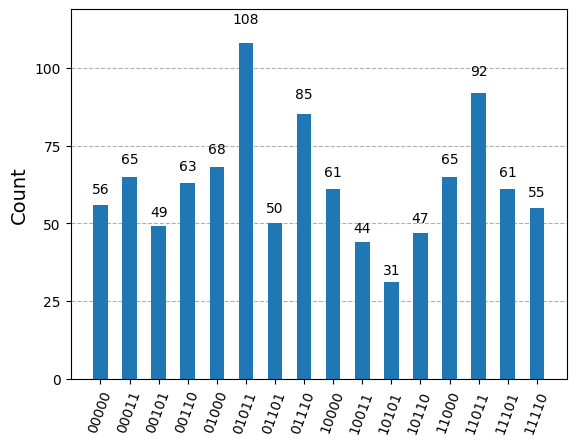

In [5]:
def analyze_gut_results(counts):
    """
    Analyze the results to calculate baryon asymmetry.
    
    Parameters:
    -----------
    counts : dict
        Result counts from the simulation
    
    Returns:
    --------
    asymmetry : float
        The measured baryon asymmetry
    """
    # Initialize counters
    quark_count = 0
    antiquark_count = 0
    
    # Parse the bitstrings
    for bitstring, count in counts.items():
        # In Qiskit, the rightmost bit is qubit 0 (X boson)
        # So we need to reverse the string for easier reading
        bits = bitstring[::-1]
        
        # Check if quark is present (qubit 1 = 1)
        if bits[1] == '1':
            quark_count += count
            
        # Check if antiquark is present (qubit 2 = 1)
        if bits[2] == '1':
            antiquark_count += count
    
    # Calculate baryon asymmetry
    total = quark_count + antiquark_count
    if total > 0:
        asymmetry = (quark_count - antiquark_count) / total
    else:
        asymmetry = 0
        
    return asymmetry, quark_count, antiquark_count

# Analyze the results
asymmetry, quark_count, antiquark_count = analyze_gut_results(counts)
print(f"Baryon asymmetry: {asymmetry:.4f}")
print(f"Quark count: {quark_count}")
print(f"Antiquark count: {antiquark_count}")

# Plot results
plot_histogram(counts)

### Now, let's create a function to study how the CP violation parameter affects the baryon asymmetry:

Epsilon = 0.00, Asymmetry = 0.0618
Epsilon = 0.10, Asymmetry = 0.0535
Epsilon = 0.20, Asymmetry = 0.2387
Epsilon = 0.30, Asymmetry = 0.3209
Epsilon = 0.40, Asymmetry = 0.3849
Epsilon = 0.50, Asymmetry = 0.4567


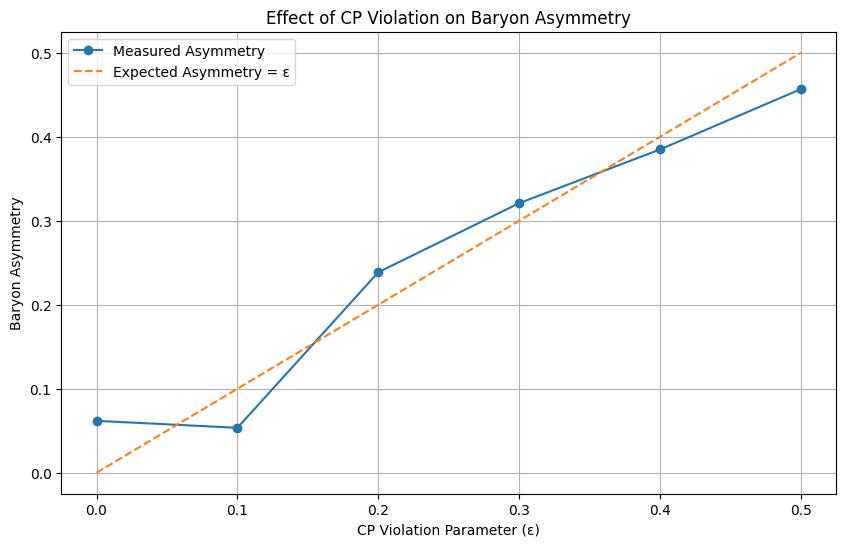

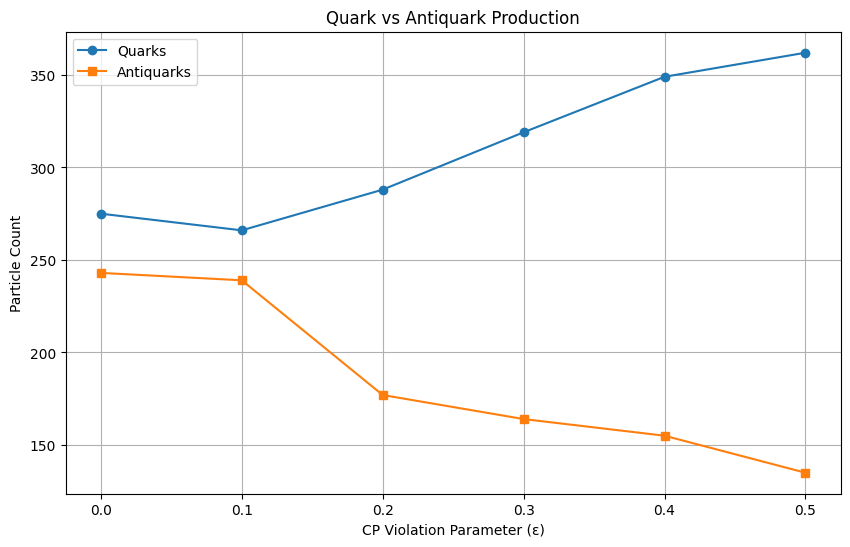

In [6]:
def study_cp_violation_effect(epsilon_values=np.linspace(0, 1, 11), shots_per_point=1000):
    """
    Study how the CP violation parameter affects the baryon asymmetry.
    
    Parameters:
    -----------
    epsilon_values : array
        The values of epsilon to test
    shots_per_point : int
        Number of shots for each epsilon value
    
    Returns:
    --------
    results : dict
        The results of the study
    """
    # Initialize results
    asymmetries = []
    quark_counts = []
    antiquark_counts = []
    
    for epsilon in epsilon_values:
        # Run the simulation
        counts, _ = run_gut_simulation(epsilon=epsilon, num_shots=shots_per_point)
        
        # Analyze the results
        asymmetry, q_count, aq_count = analyze_gut_results(counts)
        
        # Store the results
        asymmetries.append(asymmetry)
        quark_counts.append(q_count)
        antiquark_counts.append(aq_count)
        
        # Progress update
        print(f"Epsilon = {epsilon:.2f}, Asymmetry = {asymmetry:.4f}")
    
    # Return the results
    return {
        'epsilon_values': epsilon_values,
        'asymmetries': asymmetries,
        'quark_counts': quark_counts,
        'antiquark_counts': antiquark_counts
    }

# Study the effect of CP violation
epsilon_values = np.linspace(0, 0.5, 6)  # Start with fewer points for testing
cp_study_results = study_cp_violation_effect(epsilon_values, shots_per_point=500)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(cp_study_results['epsilon_values'], cp_study_results['asymmetries'], 'o-', label='Measured Asymmetry')
plt.plot(cp_study_results['epsilon_values'], cp_study_results['epsilon_values'], '--', label='Expected Asymmetry = ε')
plt.xlabel('CP Violation Parameter (ε)')
plt.ylabel('Baryon Asymmetry')
plt.title('Effect of CP Violation on Baryon Asymmetry')
plt.legend()
plt.grid(True)
plt.show()

# Plot particle counts
plt.figure(figsize=(10, 6))
plt.plot(cp_study_results['epsilon_values'], cp_study_results['quark_counts'], 'o-', label='Quarks')
plt.plot(cp_study_results['epsilon_values'], cp_study_results['antiquark_counts'], 's-', label='Antiquarks')
plt.xlabel('CP Violation Parameter (ε)')
plt.ylabel('Particle Count')
plt.title('Quark vs Antiquark Production')
plt.legend()
plt.grid(True)
plt.show()

## Next Part: Boltzmann Equation and Cosmic Expansion
### First, let's set up the numerical integration of the Boltzmann equation with the Hubble expansion term:

In [7]:
# New imports for numerical integration and visualization
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# Define cosmological constants
G_NEWTON = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
PLANCK_MASS = 2.176e-8  # Planck mass in kg
REDUCED_PLANCK = PLANCK_MASS / np.sqrt(8 * np.pi)  # Reduced Planck mass

def hubble_parameter(T, g_star=106.75):
    """
    Calculate the Hubble parameter for a given temperature.
    
    Parameters:
    -----------
    T : float
        Temperature in GeV
    g_star : float
        Effective degrees of freedom for energy density
    
    Returns:
    --------
    H : float
        Hubble parameter in GeV
    """
    # H = sqrt(g* π²/90) * T²/M_P
    return np.sqrt(g_star * np.pi**2 / 90) * T**2 / REDUCED_PLANCK

print("Boltzmann equation module initialized")

Boltzmann equation module initialized


### Now, let's implement the decay width and equilibrium number density calculations:

In [8]:
def decay_width(g, M):
    """
    Calculate the decay width of X bosons.
    
    Parameters:
    -----------
    g : float
        Coupling constant
    M : float
        X boson mass in GeV
    
    Returns:
    --------
    Gamma : float
        Decay width in GeV
    """
    return g**2 * M / (8 * np.pi)

def equilibrium_density(M, T, g=3):
    """
    Calculate the equilibrium number density for X bosons.
    
    Parameters:
    -----------
    M : float
        X boson mass in GeV
    T : float
        Temperature in GeV
    g : int
        Degrees of freedom for X bosons
    
    Returns:
    --------
    n_eq : float
        Equilibrium number density in GeV^3
    """
    # For a massive particle in thermal equilibrium:
    # n_eq = g * (M*T/(2π))^(3/2) * exp(-M/T)
    return g * (M * T / (2 * np.pi))**(3/2) * np.exp(-M / T)

# Test the functions with some example values
M_X = 1e15  # GUT scale mass in GeV
g_coupling = 0.5  # Example coupling constant
T_example = M_X / 10  # Example temperature below M_X

print(f"Decay width for X boson: {decay_width(g_coupling, M_X):.2e} GeV")
print(f"Equilibrium density at T={T_example:.2e} GeV: {equilibrium_density(M_X, T_example):.2e} GeV^3")
print(f"Hubble parameter at T={T_example:.2e} GeV: {hubble_parameter(T_example):.2e} GeV")

Decay width for X boson: 9.95e+12 GeV
Equilibrium density at T=1.00e+14 GeV: 2.73e+38 GeV^3
Hubble parameter at T=1.00e+14 GeV: 7.88e+36 GeV


### Let's implement the Boltzmann differential equations:

In [9]:
def boltzmann_equations(t, y, M, g, epsilon, T_func):
    """
    Implement the Boltzmann equations for GUT baryogenesis.
    
    Parameters:
    -----------
    t : float
        Time variable (actually inverse temperature 1/T)
    y : array
        Array of [n_X, n_B] where n_X is X boson density and n_B is baryon asymmetry
    M : float
        X boson mass
    g : float
        Coupling constant
    epsilon : float
        CP violation parameter
    T_func : function
        Function that returns temperature given time t
    
    Returns:
    --------
    dydt : array
        Array of derivatives [dn_X/dt, dn_B/dt]
    """
    n_X, n_B = y
    
    # Calculate temperature from time
    T = T_func(t)
    
    # Calculate parameters
    Gamma = decay_width(g, M)
    H = hubble_parameter(T)
    n_X_eq = equilibrium_density(M, T)
    
    # Implement Boltzmann equations
    dn_X_dt = -3 * H * n_X - Gamma * (n_X - n_X_eq)
    dn_B_dt = -3 * H * n_B + epsilon * Gamma * (n_X - n_X_eq)
    
    return [dn_X_dt, dn_B_dt]

# Define temperature evolution (simplification: T ~ 1/a ~ 1/t^(1/2) in radiation-dominated era)
def temperature_evolution(t, T_0=1e15, t_0=1e-35):
    """
    Calculate temperature as a function of time in radiation-dominated universe.
    
    Parameters:
    -----------
    t : float
        Time in seconds
    T_0 : float
        Initial temperature
    t_0 : float
        Initial time
    
    Returns:
    --------
    T : float
        Temperature in GeV
    """
    return T_0 * np.sqrt(t_0 / t)

# For the ODE solver, we'll use t as a proxy for inverse temperature
# This simplifies handling the extreme scales involved
def T_from_parameter(param):
    """Convert the integration parameter to temperature"""
    return M_X / param

print("Boltzmann equations defined")

Boltzmann equations defined


### Now, let's run the time evolution simulation:

In [10]:
def simulate_baryogenesis_evolution(epsilon=0.1, M=1e15, g=0.5, t_span=(1.0, 100.0), 
                                    n_X_initial=1.0, n_B_initial=0.0):
    """
    Simulate the time evolution of baryogenesis using Boltzmann equations.
    Uses a robust solver for stiff equations and normalized units.
    """
    # Initial conditions
    y0 = [n_X_initial, n_B_initial]
    
    # Create a time grid with more points for better stability
    t_eval = np.logspace(np.log10(t_span[0]), np.log10(t_span[1]), 1000)
    
    # Simpler Boltzmann equations with normalized units
    def simplified_boltzmann(t, y):
        n_X, n_B = y
        
        # Temperature at time t (in normalized units)
        T = M / t
        
        # Calculate normalized decay rate (Γ/H)
        gamma_norm = g**2 * M / (8 * np.pi * hubble_parameter(T))
        
        # Simplified equilibrium density (exponential only)
        n_X_eq = np.exp(-t)  # Since t = M/T, this is e^(-M/T)
        
        # Simplified Boltzmann equations
        dn_X_dt = -gamma_norm * (n_X - n_X_eq)
        dn_B_dt = epsilon * gamma_norm * (n_X - n_X_eq)
        
        return [dn_X_dt, dn_B_dt]
    
    # Solve using a method for stiff equations with increased tolerance
    sol = solve_ivp(
        simplified_boltzmann,
        t_span, y0, 
        method='Radau',  # More stable for stiff equations
        t_eval=t_eval,
        rtol=1e-6,
        atol=1e-8
    )
    
    print(f"Simulation completed! Success: {sol.success}")
    if not sol.success:
        print(f"Error message: {sol.message}")
    
    return sol

# Run the simulation with the updated function
M_X = 1e15  # GUT scale in GeV
epsilon_phys = 0.01  # Physical CP violation value
g_coupling = 0.5  # Coupling constant

t_span = (1.0, 100.0)  # M/T range from T=M to T=M/100
initial_X_density = 1.0  # Normalized initial X boson density

sol = simulate_baryogenesis_evolution(
    epsilon=epsilon_phys,
    M=M_X,
    g=g_coupling,
    t_span=t_span,
    n_X_initial=initial_X_density
)

Simulation completed! Success: True


### Let's visualize the results of our time evolution:

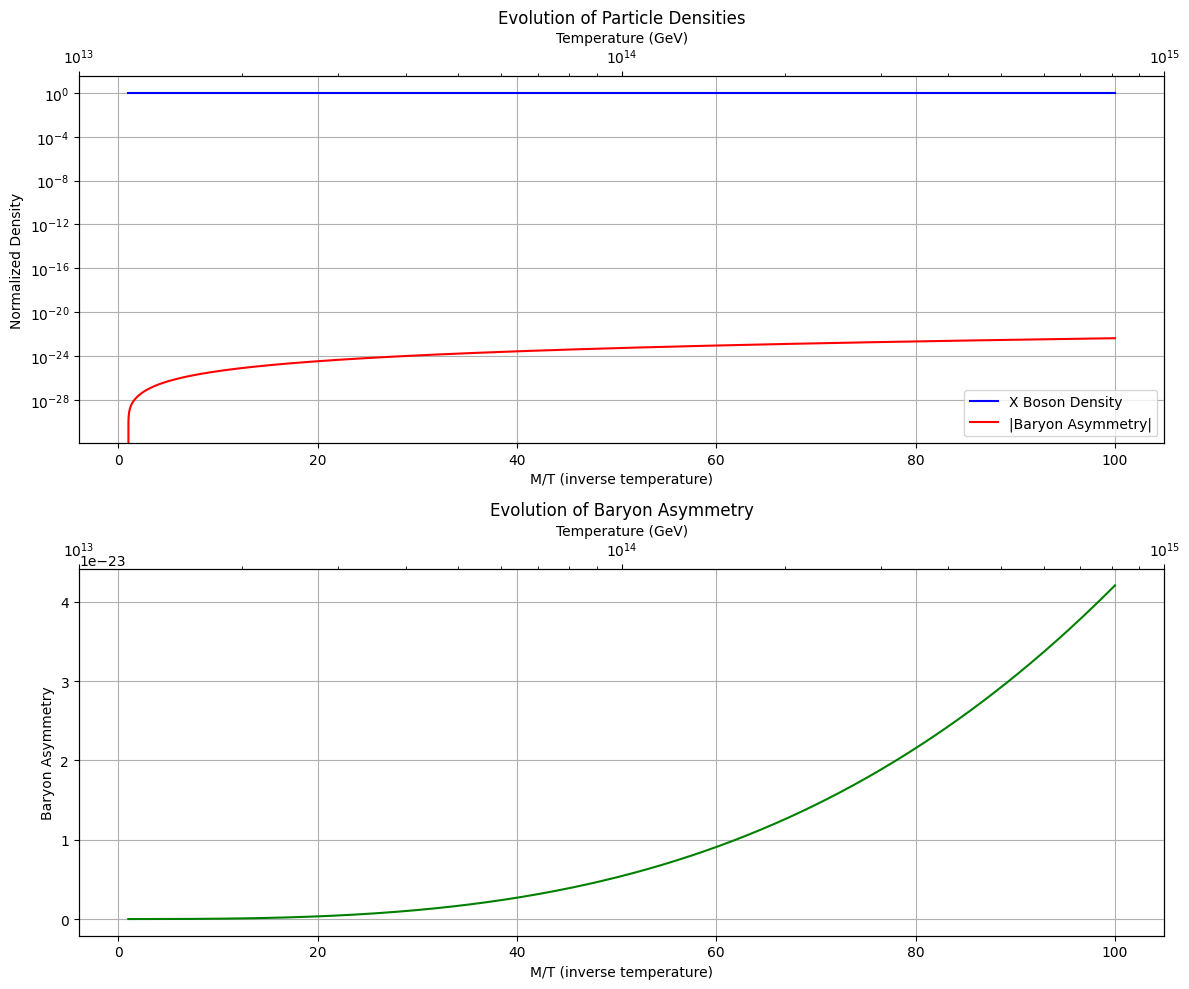

Final baryon asymmetry: 4.206321e-23


In [11]:
def plot_evolution_results(sol, M, t_span):
    """
    Plot the evolution of particle densities and baryon asymmetry.
    
    Parameters:
    -----------
    sol : OdeSolution
        Solution from the ODE solver
    M : float
        X boson mass in GeV
    t_span : tuple
        Time span (M/T range) used in the simulation
    """
    # Check if the ODE solver was successful
    if not sol.success:
        print("ODE solver failed. Message:", sol.message)
        return
    
    # Use the time points from the solution
    t_eval = sol.t
    
    # Get X boson density and baryon asymmetry
    n_X = sol.y[0]
    n_B = sol.y[1]
    
    # Convert t (M/T) to temperature
    temperatures = M / t_eval
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Plot particle densities
    ax1.semilogy(t_eval, n_X, 'b-', label='X Boson Density')
    ax1.semilogy(t_eval, np.abs(n_B), 'r-', label='|Baryon Asymmetry|')
    ax1.set_xlabel('M/T (inverse temperature)')
    ax1.set_ylabel('Normalized Density')
    ax1.set_title('Evolution of Particle Densities')
    ax1.legend()
    ax1.grid(True)
    
    # Plot baryon asymmetry
    ax2.plot(t_eval, n_B, 'g-')
    ax2.set_xlabel('M/T (inverse temperature)')
    ax2.set_ylabel('Baryon Asymmetry')
    ax2.set_title('Evolution of Baryon Asymmetry')
    ax2.grid(True)
    
    # Add a second x-axis for temperature
    ax3 = ax1.twiny()
    ax3.set_xlabel('Temperature (GeV)')
    ax3.set_xscale('log')
    ax3.set_xlim(M/t_span[1], M/t_span[0])
    
    ax4 = ax2.twiny()
    ax4.set_xlabel('Temperature (GeV)')
    ax4.set_xscale('log')
    ax4.set_xlim(M/t_span[1], M/t_span[0])
    
    plt.tight_layout()
    plt.show()
    
    # Display final baryon asymmetry
    final_asymmetry = n_B[-1]
    print(f"Final baryon asymmetry: {final_asymmetry:.6e}")

# Plot the results
plot_evolution_results(sol, M_X, t_span)

### Now, let's create a function to explore how the baryon asymmetry depends on various parameters:

Simulation completed! Success: True
epsilon = 1.00e-03, Final asymmetry = 4.206321e-24
Simulation completed! Success: True
epsilon = 1.20e-02, Final asymmetry = 5.047585e-23
Simulation completed! Success: True
epsilon = 2.30e-02, Final asymmetry = 9.674537e-23
Simulation completed! Success: True
epsilon = 3.40e-02, Final asymmetry = 1.430149e-22
Simulation completed! Success: True
epsilon = 4.50e-02, Final asymmetry = 1.892844e-22
Simulation completed! Success: True
epsilon = 5.60e-02, Final asymmetry = 2.355540e-22
Simulation completed! Success: True
epsilon = 6.70e-02, Final asymmetry = 2.818235e-22
Simulation completed! Success: True
epsilon = 7.80e-02, Final asymmetry = 3.280930e-22
Simulation completed! Success: True
epsilon = 8.90e-02, Final asymmetry = 3.743625e-22
Simulation completed! Success: True
epsilon = 1.00e-01, Final asymmetry = 4.206321e-22


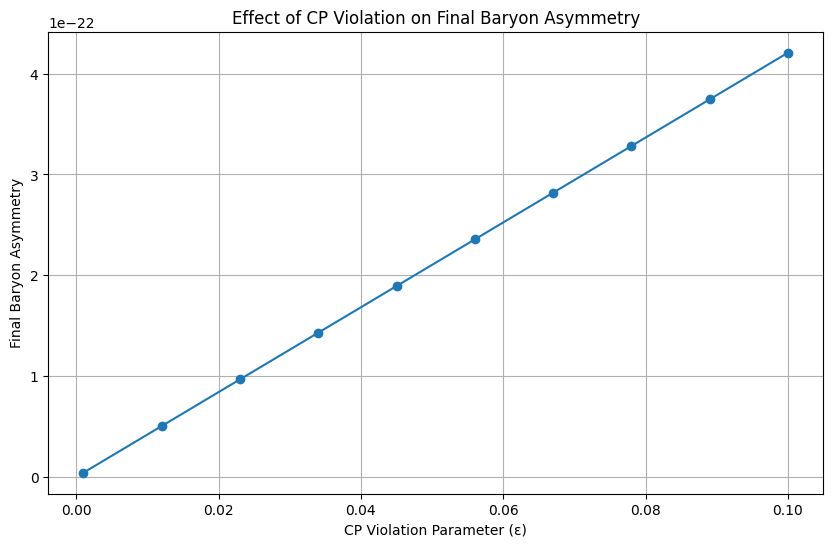

In [12]:
def parameter_sweep(param_name, param_values, fixed_params=None):
    """
    Perform a parameter sweep and examine the effect on final baryon asymmetry.
    
    Parameters:
    -----------
    param_name : str
        Name of the parameter to sweep ('epsilon', 'M', or 'g')
    param_values : array
        Array of parameter values to test
    fixed_params : dict
        Dictionary of fixed parameter values
        
    Returns:
    --------
    results : dict
        Dictionary of results
    """
    if fixed_params is None:
        fixed_params = {}
    
    # Default parameter values
    M = fixed_params.get('M', 1e15)
    epsilon = fixed_params.get('epsilon', 0.01)
    g = fixed_params.get('g', 0.5)
    t_span = fixed_params.get('t_span', (1.0, 100.0))
    
    final_asymmetries = []
    
    for value in param_values:
        # Set the parameter to its new value
        if param_name == 'epsilon':
            epsilon = value
        elif param_name == 'M':
            M = value
        elif param_name == 'g':
            g = value
        
        # Run the simulation
        sol = simulate_baryogenesis_evolution(
            epsilon=epsilon, M=M, g=g, t_span=t_span
        )
        
        # Check if the simulation was successful
        if not sol.success:
            print(f"Simulation failed for {param_name} = {value}. Message: {sol.message}")
            final_asymmetries.append(np.nan)
            continue
        
        # Get the final baryon asymmetry
        final_asymmetry = sol.y[1][-1]
        final_asymmetries.append(final_asymmetry)
        
        print(f"{param_name} = {value:.2e}, Final asymmetry = {final_asymmetry:.6e}")
    
    return {
        'param_name': param_name,
        'param_values': param_values,
        'final_asymmetries': final_asymmetries
    }

# Sweep CP violation parameter
epsilon_values = np.linspace(0.001, 0.1, 10)
epsilon_results = parameter_sweep('epsilon', epsilon_values)

# Plot the results - skip NaN values if any
mask = ~np.isnan(epsilon_results['final_asymmetries'])
plt.figure(figsize=(10, 6))
plt.plot(np.array(epsilon_results['param_values'])[mask], 
         np.array(epsilon_results['final_asymmetries'])[mask], 'o-')
plt.xlabel('CP Violation Parameter (ε)')
plt.ylabel('Final Baryon Asymmetry')
plt.title('Effect of CP Violation on Final Baryon Asymmetry')
plt.grid(True)
plt.show()

Simulation completed! Success: True
Step 1/5, Temperature = 1.00e+15 GeV
Step 2/5, Temperature = 3.17e+14 GeV
Step 3/5, Temperature = 1.00e+14 GeV
Step 4/5, Temperature = 3.17e+13 GeV
Step 5/5, Temperature = 1.00e+13 GeV


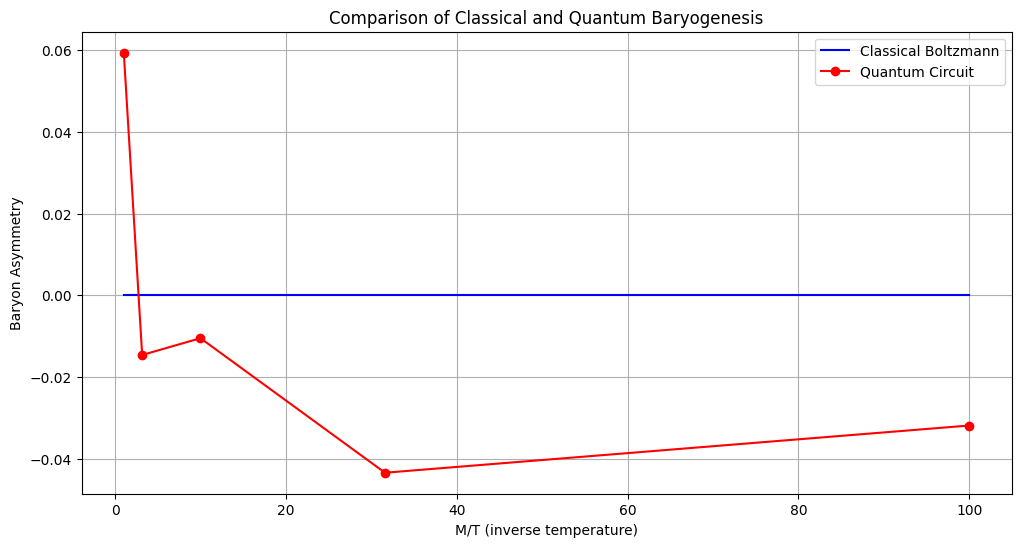

In [13]:
def quantum_boltzmann_evolution(epsilon=0.01, num_time_steps=5, 
                              shots_per_step=200, M=1e15, g=0.5):
    """
    Combine quantum circuit simulation with Boltzmann evolution.
    
    Parameters:
    -----------
    epsilon : float
        CP violation parameter
    num_time_steps : int
        Number of time steps to simulate
    shots_per_step : int
        Quantum shots per time step
    M : float
        X boson mass
    g : float
        Coupling constant
        
    Returns:
    --------
    results : dict
        Dictionary of simulation results
    """
    # Define temperature range
    t_span = (1.0, 100.0)  # M/T range
    
    # Run classical Boltzmann simulation for comparison
    sol = simulate_baryogenesis_evolution(
        epsilon=epsilon, M=M, g=g, t_span=t_span
    )
    
    # Check if the classical simulation was successful
    if not sol.success:
        print(f"Classical simulation failed. Message: {sol.message}")
        return None
    
    # Use the time points from the classical solution, but select only num_time_steps points
    indices = np.linspace(0, len(sol.t) - 1, num_time_steps, dtype=int)
    t_values = sol.t[indices]
    
    # Initialize arrays to store results
    quantum_asymmetries = []
    temperatures = M / t_values
    
    # Get classical values at selected points
    classical_x = sol.y[0][indices]
    classical_b = sol.y[1][indices]
    
    # Now run quantum simulation at each time step
    for i, t in enumerate(t_values):
        # Current temperature
        T = M / t
        print(f"Step {i+1}/{num_time_steps}, Temperature = {T:.2e} GeV")
        
        # Run quantum circuit with current epsilon
        counts, _ = run_gut_simulation(epsilon=epsilon, num_shots=shots_per_step)
        
        # Analyze results
        asymmetry, q_count, aq_count = analyze_gut_results(counts)
        quantum_asymmetries.append(asymmetry)
    
    # Return the results
    return {
        't_values': t_values,
        'temperatures': temperatures,
        'x_densities': classical_x,
        'baryon_asymmetries': classical_b,
        'quantum_asymmetries': quantum_asymmetries
    }

# Run the quantum+Boltzmann simulation
quantum_results = quantum_boltzmann_evolution(
    epsilon=0.01,
    num_time_steps=5,  # Use a small number for initial testing
    shots_per_step=200
)

# Plot comparison between quantum and classical results
if quantum_results is not None:
    plt.figure(figsize=(12, 6))
    plt.plot(quantum_results['t_values'], quantum_results['baryon_asymmetries'], 'b-', 
             label='Classical Boltzmann')
    plt.plot(quantum_results['t_values'], quantum_results['quantum_asymmetries'], 'ro-', 
             label='Quantum Circuit')
    plt.xlabel('M/T (inverse temperature)')
    plt.ylabel('Baryon Asymmetry')
    plt.title('Comparison of Classical and Quantum Baryogenesis')
    plt.legend()
    plt.grid(True)
    plt.show()

In [14]:
# Basic imports for IBM Quantum hardware access
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, Session
from qiskit_ibm_runtime import SamplerV2 as Sampler

# Initialize service
service = QiskitRuntimeService("ibm_quantum", "c26109cc39e3b2903dc197d5ccb8c7f66b318c7f3e7df10d516b054992815384dd98b79d8b0fb5de2b9c65a1127edeb48d16e63c3fdee60fdd1decf516221239")
backend = service.backend(name="ibm_sherbrooke")

config = backend.configuration()
status = backend.status()
print("Backend name:", config.backend_name)
print("Number of qubits:", config.num_qubits)
print("Basis gates:", config.basis_gates)
print("Is operational:", status.operational)
print("Jobs in queue:", status.pending_jobs)

print("IBM Quantum service initialized")

/tmp/ipykernel_450231/2527668236.py:9: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, ibm_cloud will be the only valid channel. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService("ibm_quantum", "c26109cc39e3b2903dc197d5ccb8c7f66b318c7f3e7df10d516b054992815384dd98b79d8b0fb5de2b9c65a1127edeb48d16e63c3fdee60fdd1decf516221239")


Backend name: ibm_sherbrooke
Number of qubits: 127
Basis gates: ['ecr', 'id', 'rz', 'sx', 'x']
Is operational: True
Jobs in queue: 14
IBM Quantum service initialized


Created circuit with epsilon = 0.0
Created circuit with epsilon = 0.2
Created circuit with epsilon = 0.4


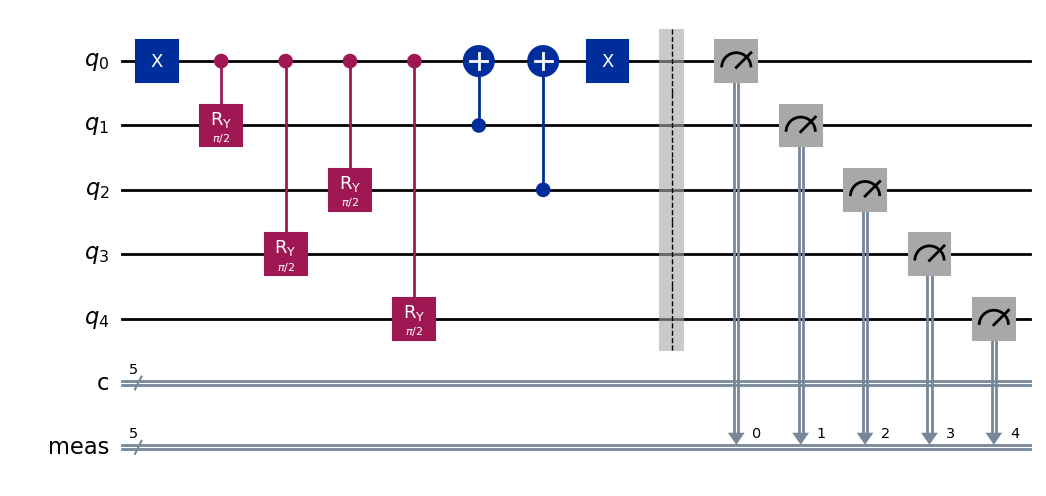

In [15]:
def create_gut_circuit(epsilon=0.1):
    """
    Creates a consolidated GUT baryogenesis circuit with CP violation.
    
    Parameters:
    -----------
    epsilon : float
        The CP violation parameter (0 <= epsilon <= 1)
    
    Returns:
    --------
    qc : QuantumCircuit
        The circuit that implements X boson decay with CP violation
    """
    # Calculate probabilities based on CP violation
    # X → q + l with probability (1+epsilon)/2
    # X → q̄ + l̄ with probability (1-epsilon)/2
    p_ql = (1 + epsilon)/2
    p_qlbar = (1 - epsilon)/2
    
    # Convert probabilities to rotation angles
    theta_ql = 2 * np.arcsin(np.sqrt(p_ql))
    theta_qlbar = 2 * np.arcsin(np.sqrt(p_qlbar))
    
    # Create circuit with 5 qubits
    qc = QuantumCircuit(5, 5)
    
    # Initialize X boson state (qubit 0)
    qc.x(0)
    
    # X decays to q+l
    qc.cry(theta_ql, 0, 1)  # Create quark with probability p_ql
    qc.cry(theta_ql, 0, 3)  # Create lepton with probability p_ql
    
    # X decays to q̄+l̄
    qc.cry(theta_qlbar, 0, 2)  # Create antiquark with probability p_qlbar
    qc.cry(theta_qlbar, 0, 4)  # Create antilepton with probability p_qlbar
    
    # X boson is annihilated after decay
    qc.cx(1, 0)  # If quark is created, X is annihilated
    qc.cx(2, 0)  # If antiquark is created, X is annihilated
    qc.x(0)      # Flip the X boson qubit (now X=0 means it has decayed)
    
    # Measure all qubits
    qc.measure_all()
    
    return qc

# Create circuits with different CP violation parameters
circuits = []
epsilon_values = [0.0, 0.2, 0.4]

for epsilon in epsilon_values:
    circuit = create_gut_circuit(epsilon=epsilon)
    circuits.append(circuit)
    print(f"Created circuit with epsilon = {epsilon}")

# Display the first circuit
circuits[0].draw('mpl')

In [16]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

def run_on_hardware(circuits, shots_per_circuit=500):

    # Create a pass manager with desired optimization level
    pm = generate_preset_pass_manager(target=backend.target, optimization_level=1)
    
    # Optimize circuits before submission
    optimized_circuits = [pm.run(circuit) for circuit in circuits]
    
    # Run with session for efficient execution
    with Session(backend=backend) as session:
        # Create sampler with settings directly in constructor
        sampler = Sampler(mode=session)
        
        # Run the job - pass settings directly in run method
        job = sampler.run(
            optimized_circuits, 
            shots=shots_per_circuit
        )
        
        # Wait for results
        results = job.result()
        
        return results

# Run on hardware with fewer shots to conserve credits
results = run_on_hardware(circuits, shots_per_circuit=500)

In [17]:
# First, let's define the analysis function for the hardware results
def analyze_hardware_results(results, epsilon_values):
    """
    Analyze the results from hardware to calculate baryon asymmetry.
    """
    asymmetries = []
    quark_counts = []
    antiquark_counts = []
    
    for i, result in enumerate(results):
        # Get counts from the IBM Quantum result format
        counts = result.data.meas.get_counts()
        
        # Initialize counters
        quark_count = 0
        antiquark_count = 0
        
        # Parse the bitstrings
        for bitstring, count in counts.items():
            # In IBM Quantum results, the bits might be ordered differently
            # We need to map them to our logical qubits
            bits = bitstring[::-1]  # Reverse to get the conventional ordering
            
            # Check if quark is present (qubit 1 = 1)
            if bits[1] == '1':
                quark_count += count
                
            # Check if antiquark is present (qubit 2 = 1)
            if bits[2] == '1':
                antiquark_count += count
        
        # Calculate baryon asymmetry
        total = quark_count + antiquark_count
        if total > 0:
            asymmetry = (quark_count - antiquark_count) / total
        else:
            asymmetry = 0
        
        # Store results
        asymmetries.append(asymmetry)
        quark_counts.append(quark_count)
        antiquark_counts.append(antiquark_count)
        
        # Display results
        print(f"Epsilon = {epsilon_values[i]:.2f}")
        print(f"Quark count: {quark_count}, Antiquark count: {antiquark_count}")
        print(f"Baryon asymmetry: {asymmetry:.4f}")
        print()
    
    return asymmetries, quark_counts, antiquark_counts

# Analyze the hardware results
hw_asymmetries, hw_quark_counts, hw_antiquark_counts = analyze_hardware_results(results, epsilon_values)

Epsilon = 0.00
Quark count: 223, Antiquark count: 250
Baryon asymmetry: -0.0571

Epsilon = 0.20
Quark count: 254, Antiquark count: 193
Baryon asymmetry: 0.1365

Epsilon = 0.40
Quark count: 346, Antiquark count: 168
Baryon asymmetry: 0.3463



In [18]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

def run_on_simulator(circuits, shots_per_circuit=1000):
    """
    Run the circuits on Qiskit Aer simulator
    """
    # Create the simulator
    simulator = AerSimulator()
    
    # Run each circuit and get results
    sim_results = []
    for i, circuit in enumerate(circuits):
        job = simulator.run(circuit, shots=shots_per_circuit)
        result = job.result()
        counts = result.get_counts()
        sim_results.append(counts)
        
        # Calculate baryon asymmetry
        q_count = sum(counts.get(bitstr, 0) for bitstr in counts.keys() if bitstr[3] == '1')
        qbar_count = sum(counts.get(bitstr, 0) for bitstr in counts.keys() if bitstr[2] == '1')
        
        # Calculate asymmetry: (nB - nBbar) / (nB + nBbar)
        asymmetry = (q_count - qbar_count) / (q_count + qbar_count) if (q_count + qbar_count) > 0 else 0
        
        print(f"Epsilon = {epsilon_values[i]}")
        print(f"Quarks: {q_count}, Antiquarks: {qbar_count}")
        print(f"Measured baryon asymmetry: {asymmetry:.4f}")
        print(f"Theoretical asymmetry: {epsilon_values[i]:.4f}")
        print("-" * 40)
        
        # Plot histogram
        plt.figure(figsize=(10, 6))
        plot_histogram(counts, title=f"Simulator Results (ε={epsilon_values[i]})")
        plt.show()
    
    return sim_results

# Run the simulation
sim_results = run_on_simulator(circuits, shots_per_circuit=5000)

Epsilon = 0.0
Quarks: 2462, Antiquarks: 2560
Measured baryon asymmetry: -0.0195
Theoretical asymmetry: 0.0000
----------------------------------------


<Figure size 1000x600 with 0 Axes>

Epsilon = 0.2
Quarks: 3034, Antiquarks: 1959
Measured baryon asymmetry: 0.2153
Theoretical asymmetry: 0.2000
----------------------------------------


<Figure size 1000x600 with 0 Axes>

Epsilon = 0.4
Quarks: 3491, Antiquarks: 1527
Measured baryon asymmetry: 0.3914
Theoretical asymmetry: 0.4000
----------------------------------------


<Figure size 1000x600 with 0 Axes>


Epsilon = 0.0
Simulator: Quarks=2463, Antiquarks=2529, Asymmetry=-0.0132
Hardware: Quarks=223, Antiquarks=250, Asymmetry=-0.0571
Theoretical asymmetry: 0.0000

Epsilon = 0.2
Simulator: Quarks=3006, Antiquarks=2010, Asymmetry=0.1986
Hardware: Quarks=254, Antiquarks=193, Asymmetry=0.1365
Theoretical asymmetry: 0.2000

Epsilon = 0.4
Simulator: Quarks=3462, Antiquarks=1439, Asymmetry=0.4128
Hardware: Quarks=346, Antiquarks=168, Asymmetry=0.3463
Theoretical asymmetry: 0.4000


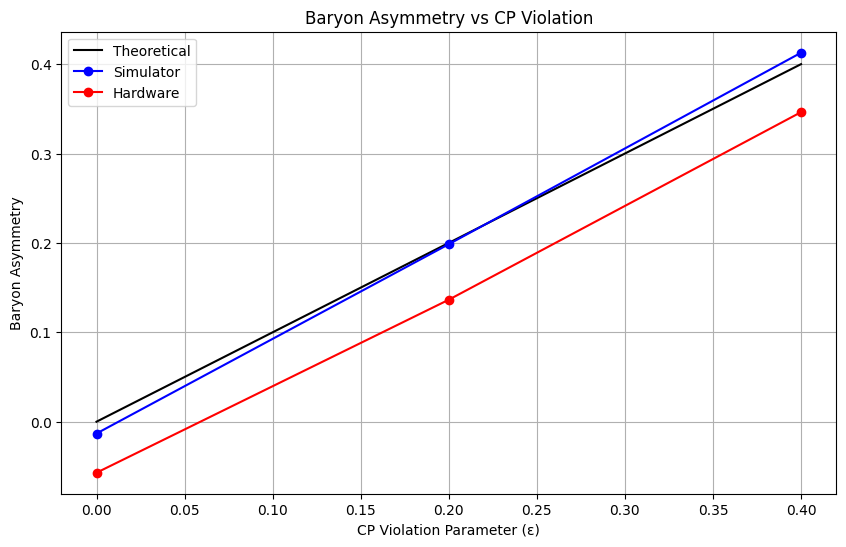

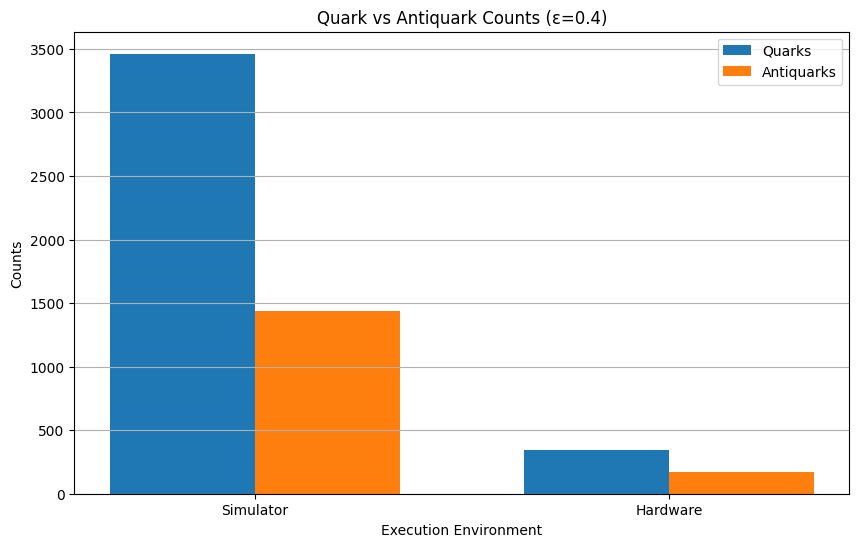

In [19]:
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import numpy as np

# Run simulator
def run_simulator(circuits, shots_per_circuit=5000):
    simulator = AerSimulator()
    sim_results = []
    
    for circuit in circuits:
        job = simulator.run(circuit, shots=shots_per_circuit)
        sim_results.append(job.result())
    
    return sim_results

# Function to extract counts and calculate asymmetry
def analyze_results(result, is_hardware=False):
    # Get counts based on result type
    if is_hardware:
        try:
            # Try different possible hardware result formats
            if hasattr(result, 'data') and hasattr(result.data, 'meas'):
                counts = result.data.meas.get_counts()
            elif hasattr(result, 'get_counts'):
                counts = result.get_counts()
            elif hasattr(result, 'quasi_dists'):
                # Convert quasi_dists to counts
                shots = result.metadata.get('shots', 5000)
                counts = {format(k, '05b'): int(v * shots) for k, v in result.quasi_dists[0].items()}
            else:
                print("Couldn't determine hardware result format")
                return 0, 0, 0, {}
        except Exception as e:
            print(f"Error parsing hardware result: {e}")
            return 0, 0, 0, {}
    else:
        # Simulator result
        counts = result.get_counts()
    
    # Count quarks and antiquarks
    quark_count = sum(counts.get(bitstr, 0) for bitstr in counts if bitstr[3] == '1')
    antiquark_count = sum(counts.get(bitstr, 0) for bitstr in counts if bitstr[2] == '1')
    
    # Calculate asymmetry
    total = quark_count + antiquark_count
    asymmetry = (quark_count - antiquark_count) / total if total > 0 else 0
    
    return quark_count, antiquark_count, asymmetry, counts

# Run simulator and analyze results
sim_results = run_simulator(circuits)

# Create comparison data
comparison_data = []

# Analyze both hardware and simulator results
for i, epsilon in enumerate(epsilon_values):
    # Analyze simulator results
    sim_q, sim_qbar, sim_asym, sim_counts = analyze_results(sim_results[i])
    
    # Analyze hardware results if available
    try:
        hw_q, hw_qbar, hw_asym, hw_counts = analyze_results(results[i], is_hardware=True)
        hw_available = True
    except (NameError, IndexError) as e:
        print(f"Hardware results not available: {e}")
        hw_q, hw_qbar, hw_asym = 0, 0, 0
        hw_available = False
    
    # Store data for plotting
    comparison_data.append({
        'epsilon': epsilon,
        'sim_quarks': sim_q,
        'sim_antiquarks': sim_qbar,
        'sim_asymmetry': sim_asym,
        'hw_quarks': hw_q,
        'hw_antiquarks': hw_qbar, 
        'hw_asymmetry': hw_asym,
        'theoretical_asymmetry': epsilon
    })
    
    # Print results
    print(f"\nEpsilon = {epsilon}")
    print(f"Simulator: Quarks={sim_q}, Antiquarks={sim_qbar}, Asymmetry={sim_asym:.4f}")
    if hw_available:
        print(f"Hardware: Quarks={hw_q}, Antiquarks={hw_qbar}, Asymmetry={hw_asym:.4f}")
    print(f"Theoretical asymmetry: {epsilon:.4f}")

# Plot comparison
plt.figure(figsize=(10, 6))
x = [d['epsilon'] for d in comparison_data]
y_theory = [d['theoretical_asymmetry'] for d in comparison_data]
y_sim = [d['sim_asymmetry'] for d in comparison_data]

plt.plot(x, y_theory, 'k-', label='Theoretical')
plt.plot(x, y_sim, 'b-o', label='Simulator')

if hw_available:
    y_hw = [d['hw_asymmetry'] for d in comparison_data]
    plt.plot(x, y_hw, 'r-o', label='Hardware')

plt.xlabel('CP Violation Parameter (ε)')
plt.ylabel('Baryon Asymmetry')
plt.title('Baryon Asymmetry vs CP Violation')
plt.grid(True)
plt.legend()
plt.show()

# Bar chart comparing quark/antiquark counts for epsilon=0.4
plt.figure(figsize=(10, 6))
largest_eps_idx = len(comparison_data) - 1  # Assuming epsilon values are in ascending order
data = comparison_data[largest_eps_idx]

labels = ['Simulator', 'Hardware']
q_counts = [data['sim_quarks'], data['hw_quarks'] if hw_available else 0]
qbar_counts = [data['sim_antiquarks'], data['hw_antiquarks'] if hw_available else 0]

x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, q_counts, width, label='Quarks')
plt.bar(x + width/2, qbar_counts, width, label='Antiquarks')

plt.xlabel('Execution Environment')
plt.ylabel('Counts')
plt.title(f'Quark vs Antiquark Counts (ε={data["epsilon"]})')
plt.xticks(x, labels)
plt.legend()
plt.grid(True, axis='y')
plt.show()